<a href="https://colab.research.google.com/github/pgader/AI-For-STEM/blob/master/FundAI_STEM_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Fundamentals of AI for STEM HW 4
# Interpreting Features Extracted by Trained CNN Filters

<h1> <center> Instructions </center> </h1>

### In this homework, you will train a CNN using Tensor Flow and try to interpret the features extracted by the Convolution Filters.  There are 32 filters in the CNN.  You should try to interpret the first 12 filters.  The interpretation of each Filter can be one of the following four categories:

1. Edge detector.  If it is an Edge, the estimate the orientation between 0 and 180 degrees.(0 and 180 degrees are horizontal)
2. Point detector. (Junction, Corner, Isolated, points, etc.)
3. Smoothing.
4. Cannot Interpret

+ The dataset is the famous (or infamous) MNIST handwritten digit data which is useful because it is easy to interpret.
__________________________________________________________________
### To start the homework, execute the cells by putting your cursor in each code cell (they are shaded with gray) sequentially and type shift - enter simultaneously. 

+ Each cell will show a number inside brackets, e.g. [1], when it is finished executing.

+ When you execute the first cell, Colab may tell you that you do not have access to their GPUs.  In that case, select the non-GPU option.

+ Once you have executed cell [8], the CNN is ready to be trained.  The training code is clearly indicated in the cell after cell [8].  
+ Execute the cell for training; it may take a couple of minutes.  It took a couple minutes on my Macbook Pro.
+ The training code will print progress after every Epoch.  It is currently set to 3 Epochs.  The performance on the Test Data should be around 98%.
+ Once the CNN is trained, the training code will be in cell [9].
+ Execute the next 2 cells and you should see a dispaly of all the filters.
+ Execute the next cell and you should see a printout of the numbers in each filter
+ Execute the next 2 cells and you can look at the Feature Map corresponding to a specific filter and input image.  
  + You can select the image from the MNIST test set by setting ImNum = N, where N is between 0 and 9999.
  + You can select the filter by setting FilterNum = M, where M is between 
  + This may be the most helpful


# This notebook is a combination and adaptation of the

## TensorFlow 2 quickstart for experts Google Colab notebook

and

## The suggestions given by Jason Brownlee at the URL:

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

_____


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/advanced"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/advanced.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/advanced.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

Import TensorFlow into your program:

In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model, models

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

Use `tf.data` to batch and shuffle the dataset:

In [3]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

Build the `tf.keras` model using the Keras [model subclassing API](https://www.tensorflow.org/guide/keras#model_subclassing):

In [4]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

  def ConvOut(self,x):
    x = self.conv1(x)
    return x

# Create an instance of the model
model = MyModel()

Choose an optimizer and loss function for training: 

In [5]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

Select metrics to measure the loss and the accuracy of the model. These metrics accumulate the values over epochs and then print the overall result.

In [6]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

Use `tf.GradientTape` to train the model:

In [7]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

Test the model:

In [8]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [9]:
#############################################################
### THIS CELL TRAINS A CNN WITH 32 FILTERS                ###
### IN THE FIRST, AND ONLY, CONVOLUTION LAYER             ###
#############################################################
EPOCHS = 3 #5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.13267728686332703, Accuracy: 96.0683364868164, Test Loss: 0.06888056546449661, Test Accuracy: 97.68999481201172
Epoch 2, Loss: 0.040091268718242645, Accuracy: 98.77166748046875, Test Loss: 0.05173422396183014, Test Accuracy: 98.18999481201172
Epoch 3, Loss: 0.020934997126460075, Accuracy: 99.33500671386719, Test Loss: 0.047581449151039124, Test Accuracy: 98.40999603271484


In [10]:
#####################################################################################
### THIS CELL IMPORTS matplotlib PACKAGES USEFUL FOR DISPLAYS                     ###
### AND STORES THE CONVOLUTION FILTERS AND BIASES IN VARIABLES filters AND biases ###
#####################################################################################
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
filters, biases = model.layers[0].get_weights()

            Here are pictures of the convolution filters



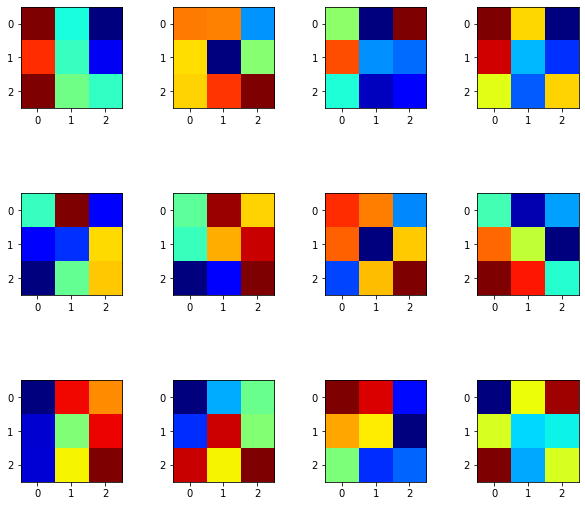

In [19]:
#####################################################################################
### THIS CELL DISPLAYS ALL 32 CONVOLUTION FILTERS AS IMAGES                       ###
### AND STORES THE CONVOLUTION FILTERS AND BIASES IN VARIABLES filters AND biases ###
#####################################################################################

print('            Here are pictures of the convolution filters', end='\n\n')

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = abs(filters.min()), abs(filters.max())
if(f_max > 0):
  filters = filters/f_max

# set up figure for display
Fig = plt.figure(figsize=(12.2, 9.6))
Fig.set_size_inches(7.5,10.5)
Fig.set_figheight(10)
Fig.set_figwidth(10)
spec = gridspec.GridSpec(ncols=4, nrows=3,
                         width_ratios=[2, 2,2,2], wspace=0.5,
                         hspace=0.1, height_ratios=[1,1,1])

# display the 32 filters as an 8 x 4 array or
# Just display the first 12 to reduce time to interpret
NToIntrpt = 12
for i in range(NToIntrpt):
  # get the filter
  f = filters[:, :, 0, i]
  # specify subplot and turn of axis
  
  ax = Fig.add_subplot(spec[i])
  ax.imshow(f, cmap='jet')
plt.show()

In [20]:
#####################################################################################
### THIS CELL PRINTS ALL 32 CONVOLUTION FILTERS                                   ###
#####################################################################################
print('       Here are the values of the convolution filters x 100 and rounded', end='\n\n')
for MIdx in range(4):
  for dIdx in range(5*3+3):
    print('-', end='')
  print('%s' %('  '),end='')
print('\n')

NFiltRows = 3
NFiltCols = 4
FiltSz    = 3
RndFilters = np.round(100*filters)
fnum = 0;
for srow in range(NFiltRows):
    for frow in range(FiltSz):
      for scol in range(NFiltCols):
        MaskIdx = srow*4 + scol
        #print(srow,frow,scol,MaskIdx)
        Mask    = np.round(RndFilters[:,:,0,MaskIdx])      
        print('%5d %5d %5d' %(Mask[frow,0], Mask[frow,1], Mask[frow,2]),end=' | ')
      print('\n')
    for MIdx in range(4):
      for dIdx in range(5*3+3):
        print('-', end='')
      print('%s' %('  '),end='')
    print('\n')

       Here are the values of the convolution filters x 100 and rounded

------------------  ------------------  ------------------  ------------------  

   59   -16   -62 |    16    15   -27 |    10   -21    39 |    51    10   -77 | 

   42   -12   -49 |     7   -50    -7 |    29    -5    -7 |    42   -37   -55 | 

   59    -3   -12 |     8    22    35 |     2   -18   -14 |     3   -49    11 | 

------------------  ------------------  ------------------  ------------------  

    3    51   -21 |   -17    35     6 |    61    37  -107 |   -32  -112   -63 | 

  -21   -17    24 |   -21    10    31 |    46  -179    14 |    45     0  -122 | 

  -31     8    26 |   -63   -52    37 |  -125    18   100 |    87    63   -39 | 

------------------  ------------------  ------------------  ------------------  

  -82    39    20 |   -87   -50   -27 |    56    43   -76 |   -28    12    33 | 

  -72   -14    39 |   -65    31   -22 |    15     3   -97 |    10    -7    -5 | 

  -72     6    52 |    31

In [21]:
#################################################
### THIS CELL AND THE NEXT PRINT/DISPLAY      ###
###  THE FILTER, IMAGE AND FEATURE MAP FOR    ###
### A SPECIFIC TEST IMAGE AND FILTER          ###
###                                           ###
### JUST EXECUTE THIS CELL ONCE.              ###
### IT RUNS THE TEST SET THROUGH THE MODEL    ###
#################################################
predictions = model(x_test, training=False)

Filter number 11 is

 -28    12    33  

  10    -7    -5  

  34   -10    10  



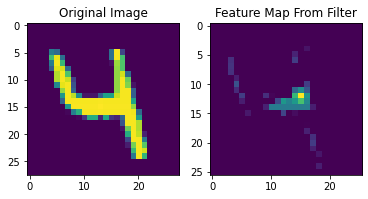

In [43]:
#################################################
###                                           ###
### THIS CELL PRINTS AND DISPLAYS             ###
### THE FILTER, IMAGE AND FEATURE MAP FOR     ###
### A SPECIFIC TEST IMAGE AND FILTER          ###
### THAT YOU PICK                             ###
###                                           ###
#################################################

### SET THE FILTER AND IMAGE NUMBER PARAMETERS ###
FilterNum = 11 #MUST BE BETWEEN 0 AND 31
ImNum     = 6025 #MUST BE BETWEEN 0 AND 9999

### GET THE ORIGINAL IMAGE.                          ###
### Im IS FOR DISPLAY.                               ###
### ImTf IS IN CORRECT FORMAT TO ACCESS FEATURE MAPS ###
ImTf  = x_test[ImNum]
Im    = np.reshape(ImTf, [28,28])
ImTf  = ImTf[tf.newaxis,...].astype("float32")

### GET THE FEATURE MAP AND FILTER ###
FMaps = model.conv1(ImTf)
FMap  = FMaps[0,:,:,FilterNum]
filt  = RndFilters[:,:,0,FilterNum]

### PRINT THE FILTER ###
print('Filter number %d is\n' %FilterNum)
for r in range(3):
  for c in range(3):
    print('%4d ' %filt[r,c], end=' ')
  print('\n')

  ### DISPLAY THE ORGINAL IMAGE AND THE FEATURE MAP ###
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(Im)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(FMap)
plt.title('Feature Map From Filter')
plt.show()